/var/folders/f6/ggzrtr6d13l0g85_pyz_1zhm0000gp/T/ipykernel_31080/4055479876.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Recommender')


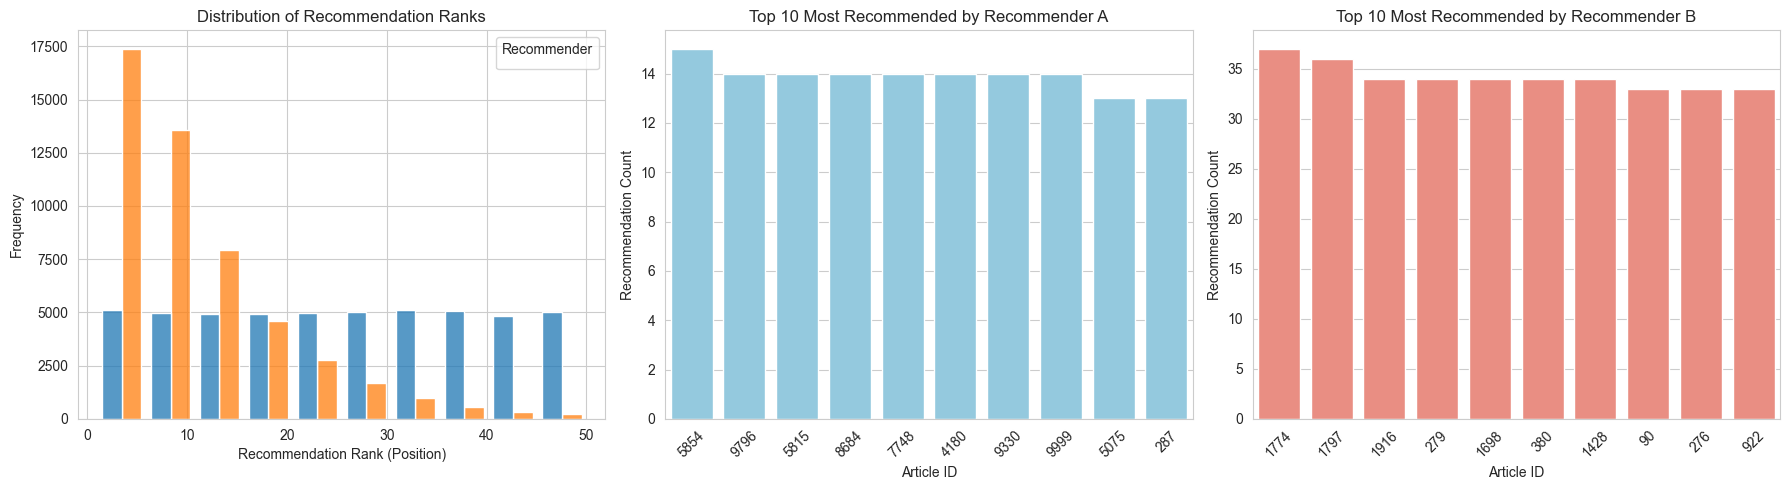

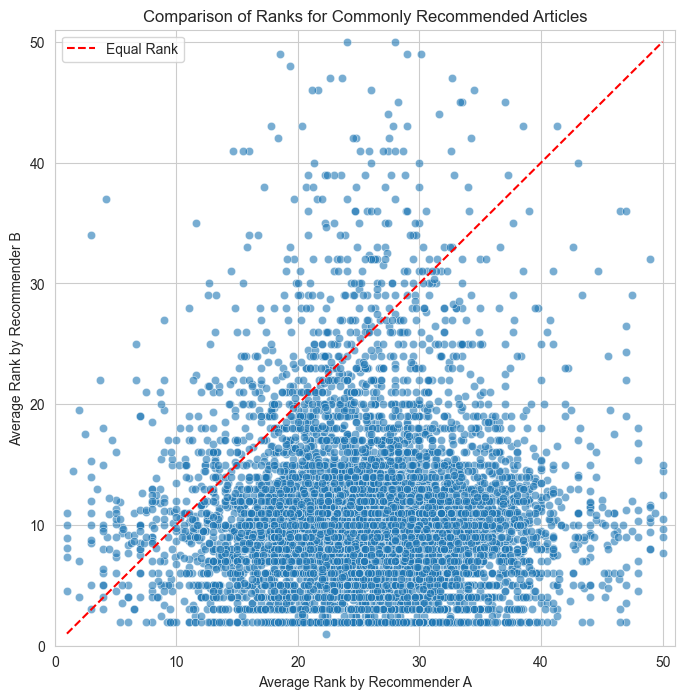

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate Sample Data ---
# Let's assume we have 10,000 articles and we're showing top 50 recommendations
num_articles = 10000
num_recommendations = 50000 # Total recommendations made by each system

# Recommender A's behavior: Tends to recommend a wider variety of articles
recommender_a_recs = pd.DataFrame({
    'article_id': np.random.randint(0, num_articles, num_recommendations),
    'rank': np.random.randint(1, 51, num_recommendations), # Ranks from 1 to 50
    'recommender': 'Recommender A'
})

# Recommender B's behavior: Focuses more on a smaller, popular set of articles
# and tends to rank them higher.
popular_articles_b = np.random.randint(0, num_articles / 5, int(num_recommendations * 0.8))
other_articles_b = np.random.randint(num_articles / 5, num_articles, int(num_recommendations * 0.2))
article_ids_b = np.concatenate([popular_articles_b, other_articles_b])
np.random.shuffle(article_ids_b)

recommender_b_recs = pd.DataFrame({
    'article_id': article_ids_b,
    # Using a geometric distribution to simulate more recommendations at higher ranks
    'rank': np.random.geometric(p=0.1, size=num_recommendations) % 50 + 1,
    'recommender': 'Recommender B'
})

# Combine the data
df = pd.concat([recommender_a_recs, recommender_b_recs], ignore_index=True)


# --- 2. Visualization ---

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# --- Plot 1: Rank Distribution Histogram ---
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='rank', hue='recommender', multiple='dodge', binwidth=5, shrink=0.8)
plt.title('Distribution of Recommendation Ranks')
plt.xlabel('Recommendation Rank (Position)')
plt.ylabel('Frequency')
plt.legend(title='Recommender')

# --- Plot 2: Item Recommendation Frequency (Top 10) ---
plt.subplot(1, 3, 2)
# Get top 10 most recommended articles for Recommender A
top_10_a = df[df['recommender'] == 'Recommender A']['article_id'].value_counts().nlargest(10)
sns.barplot(x=top_10_a.index, y=top_10_a.values, color='skyblue', order=top_10_a.index)
plt.title('Top 10 Most Recommended by Recommender A')
plt.xlabel('Article ID')
plt.ylabel('Recommendation Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
# Get top 10 most recommended articles for Recommender B
top_10_b = df[df['recommender'] == 'Recommender B']['article_id'].value_counts().nlargest(10)
sns.barplot(x=top_10_b.index, y=top_10_b.values, color='salmon', order=top_10_b.index)
plt.title('Top 10 Most Recommended by Recommender B')
plt.xlabel('Article ID')
plt.ylabel('Recommendation Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# --- Plot 3: Comparative Rank Scatter Plot ---
# Find articles recommended by BOTH systems
recs_a = df[df['recommender'] == 'Recommender A'].rename(columns={'rank': 'rank_A'})[['article_id', 'rank_A']]
recs_b = df[df['recommender'] == 'Recommender B'].rename(columns={'rank': 'rank_B'})[['article_id', 'rank_B']]

# For this plot, we care about the average rank if an item is recommended multiple times
avg_rank_a = recs_a.groupby('article_id').mean()
avg_rank_b = recs_b.groupby('article_id').mean()

# Merge to find common articles
common_articles = pd.merge(avg_rank_a, avg_rank_b, on='article_id', how='inner')

plt.figure(figsize=(8, 8))
sns.scatterplot(data=common_articles, x='rank_A', y='rank_B', alpha=0.6)
# Add a y=x line for reference. Points on this line are ranked equally.
plt.plot([1, 50], [1, 50], 'r--', label='Equal Rank')
plt.title('Comparison of Ranks for Commonly Recommended Articles')
plt.xlabel('Average Rank by Recommender A')
plt.ylabel('Average Rank by Recommender B')
plt.xlim(0, 51)
plt.ylim(0, 51)
plt.legend()
plt.grid(True)
plt.show()